In [18]:
import os
import numpy as np
from skimage import io, color
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [181]:
# Function to load images from directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img / 255.0)
    return images

In [182]:
# Function to compute image differences
def image_difference(image1, image2):
    return np.abs(image1 - image2)

In [183]:
# Function to compute image ratio
def image_ratio(image1, image2):
    # Convert images to floating-point arrays
    image1_float = image1.astype(float)
    image2_float = image2.astype(float)
    
    # Perform division, handling divide by zero cases
    ratio = np.divide(image1_float, image2_float, out=np.zeros_like(image1_float), where=(image2_float!=0))
    
    return ratio



In [184]:
# Function to compute change vector analysis (CVA)
def change_vector_analysis(image1, image2):
    hsv1 = color.rgb2hsv(image1)
    hsv2 = color.rgb2hsv(image2)
    hue_diff = np.abs(hsv1[:,:,0] - hsv2[:,:,0])
    saturation_diff = np.abs(hsv1[:,:,1] - hsv2[:,:,1])
    value_diff = np.abs(hsv1[:,:,2] - hsv2[:,:,2])
    return hue_diff, saturation_diff, value_diff


In [185]:
# Load images from folders A and B
folder_A = 'trainval/A'
folder_B = 'trainval/B'
folder_label = 'trainval/label'




In [186]:
images_A = load_images_from_folder(folder_A)


In [187]:
# images_A = [image / 255 for image in images_A]

In [188]:
print(images_A[40])

[[[0.63921569 0.60784314 0.53333333]
  [0.63921569 0.60784314 0.53333333]
  [0.64313725 0.61176471 0.5372549 ]
  ...
  [0.63529412 0.60784314 0.53333333]
  [0.63137255 0.60392157 0.52941176]
  [0.63137255 0.60392157 0.52941176]]

 [[0.64313725 0.61176471 0.5372549 ]
  [0.64313725 0.61176471 0.5372549 ]
  [0.64313725 0.61176471 0.5372549 ]
  ...
  [0.63137255 0.60392157 0.52941176]
  [0.63137255 0.60392157 0.52941176]
  [0.63137255 0.60392157 0.52941176]]

 [[0.65098039 0.61960784 0.54117647]
  [0.64705882 0.61568627 0.5372549 ]
  [0.64705882 0.61568627 0.5372549 ]
  ...
  [0.63529412 0.60784314 0.53333333]
  [0.63529412 0.60784314 0.53333333]
  [0.63529412 0.60784314 0.53333333]]

 ...

 [[0.52156863 0.54901961 0.52156863]
  [0.52156863 0.54901961 0.52156863]
  [0.51764706 0.54509804 0.51764706]
  ...
  [0.5372549  0.54901961 0.50196078]
  [0.53333333 0.54509804 0.50196078]
  [0.5254902  0.5372549  0.49411765]]

 [[0.54117647 0.56862745 0.5372549 ]
  [0.54117647 0.56862745 0.5372549 ]


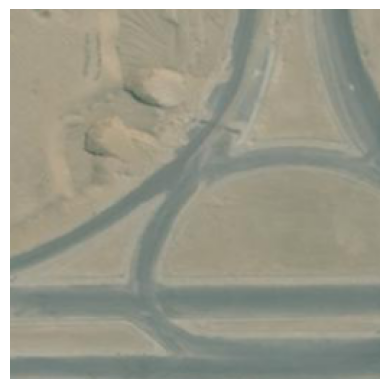

In [189]:
plt.imshow(images_A[40])
plt.axis('off')  
plt.show()

In [190]:
images_B = load_images_from_folder(folder_B)


In [191]:
labels = load_images_from_folder(folder_label)

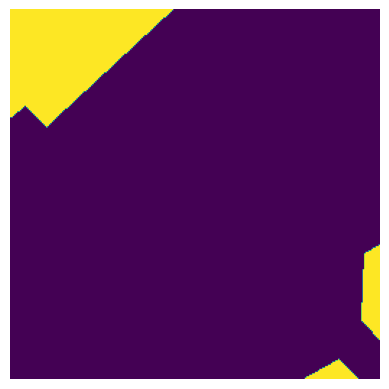

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [192]:
plt.imshow(labels[870])
plt.axis('off')  
plt.show()

print(labels[870])

In [12]:
# # Prepare feature vectors and labels for image differencing
# X_diff = []
# y_diff = []

# for image_A, image_B, label in zip(images_A, images_B, labels):
#     diff = image_difference(image_A, image_B).flatten()
#     X_diff.append(diff)
#     y_diff.append(label.flatten())

# X_diff = np.array(X_diff)
# y_diff = np.array(y_diff)

In [13]:
# print(X_diff.shape, y_diff.shape)

(4868, 196608) (4868, 65536)


In [193]:
def compute_absolute_difference(image1, image2):
    return cv2.absdiff(image1, image2)

In [228]:
def threshold_image(diff_image, threshold):
    _, binary_mask = cv2.threshold(diff_image, threshold, 1, cv2.THRESH_BINARY)
    # Convert to single-channel by averaging across channels
    binary_mask = np.mean(binary_mask, axis=2)
    _, binary_mask = cv2.threshold(binary_mask, 0.5, 1, cv2.THRESH_BINARY)
    return binary_mask


In [219]:
def evaluate_change_detection(binary_mask, labels):
    # Flatten the binary mask and labels for comparison
    binary_flat = binary_mask.flatten()
    labels_flat = labels.flatten()
    
    # print(binary_flat.shape)
    # print(labels_flat.shape)
    # Compute evaluation metrics
    accuracy = accuracy_score(labels_flat, binary_flat)
    precision = precision_score(labels_flat, binary_flat, average='micro')
    recall = recall_score(labels_flat, binary_flat, average='micro')
    

    
    return accuracy, precision, recall

In [236]:
threshold_value = 0.35  # You may need to experiment with different threshold values

evaluation_results = []

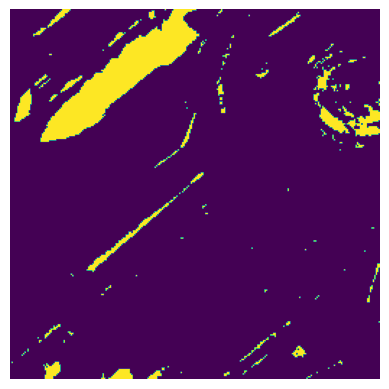

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [237]:
abs_diff = compute_absolute_difference(images_A[870], images_B[870])
    
# Step 2: Threshold the absolute difference
binary_mask = threshold_image(abs_diff, threshold_value)
    
# binary_mask = [b > 0.5 for b in np.array(binary_mask).flatten()]

plt.imshow(binary_mask)
plt.axis('off')  
plt.show()

print(binary_mask)

In [224]:
i = 0
for image_A, image_B, label in zip(images_A, images_B, labels):
    print("image:",i)
    # Step 1: Compute absolute difference
    abs_diff = compute_absolute_difference(image_A, image_B)
    
    # Step 2: Threshold the absolute difference
    binary_mask = threshold_image(abs_diff, threshold_value)
    
    # binary_mask = [b > 0.5 for b in np.array(binary_mask).flatten()]
    
    # if i == 870:
    #     plt.imshow(binary_mask)
    #     plt.axis('off')  
    #     plt.show()

    # print(np.array(labels).flatten())
    
    # print(np.array(label))
    # print(np.array(binary_mask))
    
    # Step 3: Evaluate change detection
    accuracy, precision, recall = evaluate_change_detection(np.array(binary_mask), np.array(label))
    
    evaluation_results.append((accuracy, precision, recall))
    i += 1

image: 0
(65536,)
(65536,)
image: 1
(65536,)
(65536,)
image: 2
(65536,)
(65536,)
image: 3
(65536,)
(65536,)
image: 4
(65536,)
(65536,)
image: 5
(65536,)
(65536,)
image: 6
(65536,)
(65536,)
image: 7
(65536,)
(65536,)
image: 8
(65536,)
(65536,)
image: 9
(65536,)
(65536,)
image: 10
(65536,)
(65536,)
image: 11
(65536,)
(65536,)
image: 12
(65536,)
(65536,)
image: 13
(65536,)
(65536,)
image: 14
(65536,)
(65536,)
image: 15
(65536,)
(65536,)
image: 16
(65536,)
(65536,)
image: 17
(65536,)
(65536,)
image: 18
(65536,)
(65536,)
image: 19
(65536,)
(65536,)
image: 20
(65536,)
(65536,)
image: 21
(65536,)
(65536,)
image: 22
(65536,)
(65536,)
image: 23
(65536,)
(65536,)
image: 24
(65536,)
(65536,)
image: 25
(65536,)
(65536,)
image: 26
(65536,)
(65536,)
image: 27
(65536,)
(65536,)
image: 28
(65536,)
(65536,)
image: 29
(65536,)
(65536,)
image: 30
(65536,)
(65536,)
image: 31
(65536,)
(65536,)
image: 32
(65536,)
(65536,)
image: 33
(65536,)
(65536,)
image: 34
(65536,)
(65536,)
image: 35
(65536,)
(65536,)
im

In [225]:
# Calculate average evaluation metrics
avg_accuracy = np.mean([result[0] for result in evaluation_results])
avg_precision = np.mean([result[1] for result in evaluation_results])
avg_recall = np.mean([result[2] for result in evaluation_results])

In [226]:
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)

Average Accuracy: 0.9173831641918925
Average Precision: 0.9173831641918925
Average Recall: 0.9173831641918925


In [8]:
# # Prepare feature vectors and labels for rationing
# X_ratio = []
# y_ratio = []

# for image_A, image_B, label in zip(images_A, images_B, labels):
#     ratio = image_ratio(image_A, image_B).flatten()
#     X_ratio.append(ratio)
#     y_ratio.append(label.flatten())

# X_ratio = np.array(X_ratio)
# y_ratio = np.array(y_ratio).flatten()

In [9]:
# # Prepare feature vectors and labels for change vector analysis (CVA)
# X_cva = []
# y_cva = []

# for image_A, image_B, label in zip(images_A, images_B, labels):
#     hue_diff, sat_diff, val_diff = change_vector_analysis(image_A, image_B)
#     features = np.concatenate((hue_diff.flatten(), sat_diff.flatten(), val_diff.flatten()))
#     X_cva.append(features)
#     y_cva.append(label.flatten())

# X_cva = np.array(X_cva)
# y_cva = np.array(y_cva).flatten()

In [14]:
# # Split data into training and testing sets for image differencing
# X_diff_train, X_diff_test, y_diff_train, y_diff_test = train_test_split(X_diff, y_diff, test_size=0.2, random_state=42)


In [ ]:
# # Train Random Forest classifier for image differencing
# clf_diff = RandomForestClassifier(n_estimators=100, random_state=42)
# clf_diff.fit(X_diff_train, y_diff_train)

In [ ]:
# # Predict labels for test data for image differencing
# y_diff_pred = clf_diff.predict(X_diff_test)

In [ ]:
# # Evaluate model performance for image differencing
# accuracy_diff = accuracy_score(y_diff_test, y_diff_pred)
# print("Accuracy for Image Differencing:", accuracy_diff)
# print("Classification Report for Image Differencing:\n", classification_report(y_diff_test, y_diff_pred))
